# <font color = Crimson size = 6> <b>Статистические гипотезы</b> </font>

___
## <font color = DarkGreen size = 5> <b>Гипотеза о равенстве генеральных средних двух распределений</b> </font>

Из двух **генеральных совокупностей** извлечены **выборки** объёмов $n$ и $m$ и найдены их **выборочные средние**: $\bar{x}$ и $\bar{y}$ соответственно. Требуется **на уровне значимости** $\alpha$ проверить гипотезу $H_0: \bar{X} = \bar{Y}$ о равенстве **генеральных средних** против одной из следующих конкурирующих гипотез:\
$H_1: \bar{X} < \bar{Y}$ – левосторонняя критическая область \
$H_1: \bar{X} > \bar{Y}$ – правосторонняя критическая область \
$H_1: \bar{X} \not= \bar{Y}$ – двусторонняя критическая область

___
### <font color = MediumBlue size = 4> <b>Выборки независимы ($n>30$,$m>30$),<br>генеральные совокупности распределены нормально<br>и известны их дисперсии $\sigma_x^2$ и $\sigma_y^2$</b> </font>

Для проверки нулевой гипотезы используют статистический критерий \
$\displaystyle Z = \frac{\bar{x}-\bar{y}}{\displaystyle \sqrt{\frac{\sigma_x^2}{n}+\frac{\sigma_y^2}{m}}}$

Критическая область однозначно определяется критическим значением $z_к$, которое отыскивается из соотношения: \
$\displaystyle \Phi(z_к) = \frac{1-2\alpha}{2}$ – для односторонней области \
$\displaystyle \Phi(z_к) = \frac{1-\alpha}{2}$ – для двусторонней области \
$\alpha$ – выбранный уровень значимости \
$\Phi(z)$ – функция Лапласа

Далее на основании выборочных данных рассчитывается наблюдаемое значение критерия:
$\displaystyle z_н = \frac{\bar{x}-\bar{y}}{\displaystyle \sqrt{\frac{\sigma_x^2}{n}+\frac{\sigma_y^2}{m}}}$

Если $z_н$ в критическую область НЕ попадает, то гипотезу $H_0: \bar{X} = \bar{Y}$ на уровне значимости $\alpha$ принимаем. \
Если же попадает, то нулевая гипотеза отвергается в пользу альтернативной гипотезы $H_1$.


___
### <font color = MediumBlue size = 4> <b>Независимые выборки достаточно большие ($n>30$,$m>30$),<br>генеральные дисперсии неизвестны,<br>генеральные совокупности могут иметь и другое распределение (не нормальное)</b> </font>

Для проверки нулевой гипотезы используют статистический критерий \
$\displaystyle Z = \frac{\bar{x}-\bar{y}}{\displaystyle \sqrt{\frac{D_x^2}{n}+\frac{D_y^2}{m}}}$, где \
$\bar{x}$, $\bar{y}$ - выборочные средние \
$D_x^2$, $D_y^2$ - смещенные выборочные дисперсии (можно использовать и несмещенную)

___
### <font color = MediumBlue size = 4> <b>Малые независимые выборки ($n<30$,$m<30$),<br>генеральные совокупности распределены нормально<br>и дисперсии их неизвестны</b> </font>

Если предположить или доказать, что генеральные дисперсии одинаковы (хотя и не известны), то для проверки гипотезы \
$H_0: \bar{X} = \bar{Y}$ (значимо или незначимо различаются выборочные средние $\bar{x}$ и $\bar{y}$, найденные по независимым малым выборкам объемов $n$ и $m$) можно использовать следующий критерий:

$\displaystyle T = \frac{\bar{x}-\bar{y}}{\sqrt{(n-1)S_x^2+(m-1)S_y^2}} \cdot \sqrt{\frac{nm(n+m-2)}{n+m}}$, где \
$\bar{x}$, $\bar{y}$ - выборочные средние \
$S_x^2$, $S_y^2$ - несмещенные выборочные дисперсии

Эта случайная величина распределена по закону Стьюдента с $k=n+m-2$ степенями свободы.

##### <font color = SlateBlue size = 3> Пример </font>

Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t-критерий проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами статистически достоверными. Средний возраст мужчин равен 45, sd = 9. Средний возраст женщин равен 34, sd = 10.

$H_0: \bar{X} = \bar{Y}$ \
$H_1: \bar{X} \not= \bar{Y}$ – двусторонняя критическая область

Если $|t_н| < t_к$, то гипотеза $H_0$ принимается, в противном случае – отвергается.

In [1]:
from math import sqrt
from scipy.stats import t

a_x, sd_x, a_y, sd_y = 45, 9, 34, 10
n, m = 100, 100
alpha = 0.05

se = sqrt((sd_x**2+sd_y**2)/n)
Tn = round((a_x - a_y)/se,2)
print(f'{Tn = }')

df = n + m - 2
Tk = t.ppf(1-alpha/2, df)
print(f'{Tk = }')

print(f'H0: M(X)=M(Y) is {abs(Tn)<Tk}')

Tn = 8.18
Tk = 1.9720174778338955
H0: M(X)=M(Y) is False


In [2]:
p_value = (1-t.cdf(abs(Tn),df))*2
print(f'{p_value = }')
print(f'H0: M(X)=M(Y) is {p_value>alpha}')

p_value = 3.375077994860476e-14
H0: M(X)=M(Y) is False


___
### <font color = MediumBlue size = 4> <b>Выборки зависимы,<br>генеральные совокупности распределены нормально<br>и дисперсии их неизвестны</b> </font>

Здесь рассматриваются выборки одинакового объёма, варианты которых попарно зависимы.

Пусть генеральные совокупности $X$ и $Y$ распределены нормально, причем их дисперсии неизвестны. \
Требуется при уровне значимости $\alpha$ проверить нулевую гипотезу $H_0: M(X) = M(Y)$ о равенстве генеральных средних нормальных совокупностей с неизвестными дисперсиями при конкурирующей гипотезе $H_1: M(X) \not= M(Y)$ по двум зависимым выборкам одинакового объема.

В случае зависимых выборок гипотеза о равенстве генеральных средних сводится к уже разобранной **гипотезе о значении генеральной средней**. Тогда речь идет о случайной величине $\bar{D}=\bar{x}-\bar{y}$ – случайной разнице между случайными значениями $\bar{x}$ и $\bar{y}$ выборочных средних. \
И мы проверяем гипотезу о том, что генеральная средняя (матожидание) этой разницы равна нулю \
$H_0: M(\bar{D})=0$ против \
$H_1: M(\bar{D})\not=0$ или $H_1: M(\bar{D})>0$ или $H_1: M(\bar{D})<0$.

$\displaystyle T = \frac{\bar{d}\sqrt{n}}{S_d}$, где \
$\bar{d}$ – случайная разница между выборочными средними, \
$S_d$ - несмещенное стандартное отклонение.

Критерий имеет распределение Стьюдента с количеством степеней свободы $k=n-1$.\
$t_к$ ищем по таблице критических значений Стьюдента.

Для $t_н$ находим 

* выборочную среднюю: $\displaystyle \bar{d} = \bar{x} - \bar{y} = \frac{\sum{d_i}}{n}$

* несмещенное стандартное отклонение: $\displaystyle S_d = \sqrt{\displaystyle \frac{\sum{d_i^2} - \displaystyle \frac{(\sum{d_i})^2}{n}}{n-1}}$


___
## <font color = DarkGreen size = 5> <b>Гипотеза о равенстве генеральных дисперсий двух нормальных распределений</b> </font>

Пусть генеральные совокупности $X$ и $Y$ распределены нормально. По независимым выборкам с объемами $n$ и $m$ соответственно извлеченным из этих совокупностей, найдены их несмещенные дисперсии $S_x^2$ и $S_y^2$. Требуется по несмещенным дисперсиям при заданном уровне значимости $\alpha$ проверить нулевую гипотезу, состоящую в том, что генеральные дисперсии рассматриваемых совокупностей равны между собой: $H_0: D(X)=D(Y)$.

Учитывая, что $S_x^2$ и $S_y^2$ – несмещенные дисперсии, т.е. $M(S_x^2)=D(X)$ и $M(S_y^2)=D(Y)$, \
то нулевую гипотезу можно записать так: \
$H_0: M(S_x^2) = M(S_y^2)$

Таким образом, требуется проверить, что математические ожидания несмещенных выборочных дисперсий равны между собой. Такая задача ставится потому, что обычно несмещенные дисперсии оказываются различными. Возникает вопрос: значимо (существенно) или незначимо различаются исправленные дисперсии?

> Если окажется, что нулевая гипотеза справедлива, т.е. генеральные дисперсии одинаковы, то различие исправленных дисперсий незначимо и объясняется случайными причинами.\
Если нулевая гипотеза отвергнута, т.е. генеральные дисперсии неодинаковы, то различие исправленных дисперсий значимо и не 
может быть объяснено случайными причинами, а является следствием того, что сами генеральные дисперсии различны.

В качестве критерия проверки нулевой гипотезы примем отношение большей несмещенной дисперсии к меньшей, т.е. случайную величину $\displaystyle F = \frac{S_{бол}^2}{S_{мен}^2}$

Данная случайная величина имеет **распределение Фишера-Снедекора** (F-распределение) со степенями свободы: \
$k_1=n-1$ и $k_2=m-1$, если $S_x^2 > S_y^2$ \
или \
$k_1=m-1$ и $k_2=n-1$, если $S_x^2 < S_y^2$ \
То есть, степень свободы $k_1$ соответствует выборке с бОльшей несмещенной дисперсией.
<br><br>


В качестве альтернативы рассматривают одну из следующих гипотез:

1) $H_1: \sigma_x^2 > \sigma_y^2$, если $S_x^2 > S_y^2$ **либо** $H_1: \sigma_y^2 > \sigma_x^2$, если $S_y^2 > S_x^2$.\
Для этой гипотезы строят правостороннюю критическую область:
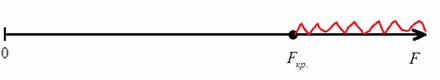
Критическое значение $F_к = F_к(\alpha,k_1,k_2)$

2) $H_1: \sigma_x^2 \not= \sigma_y^2$ – для этой гипотезы строится двусторонняя критическая область:
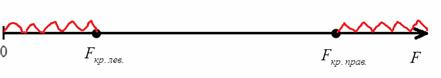
Для решения нашей задачи достаточно найти лишь правое критическое значение $F_{к.пр.} = F_к(\alpha/2,k_1,k_2)$
<br><br>


На основании выборочных данных рассчитывается наблюдаемое значение критерия $F_н$, и если оно попадает в критическую область ($F_н > F_к$ для обоих случаев), то гипотеза $H_0: \sigma_x^2 = \sigma_y^2$ **отвергается**. Если $F_н < F_к$, то **принимается**.

In [1]:
from scipy.stats import f

alpha = 0.05
p = 1 - alpha
k1, k2 = 4, 6

# правосторонняя критическая область
Fk = f.ppf(p, k1, k2)
print(f'{Fk = }')

alpha = 1 - f.cdf(Fk, k1, k2)
print(f'{alpha = :.2f}')

# двусторонняя критическая область
p = 1 - alpha/2
Fk = f.ppf(p, k1, k2)
print(f'{Fk = }')

alpha = (1 - f.cdf(Fk, k1, k2))*2
print(f'{alpha = :.2f}')

Fk = 4.533676950275243
alpha = 0.05
Fk = 6.22716116435764
alpha = 0.05


##### <font color = SlateBlue size = 3> Пример </font>

Некоторая физическая величина измерена $n=7$ и $m=5$ раз двумя различными способами. По результатам измерений найдены соответствующие погрешности $S_x^2=6.3$ и $S_y^2=10.1$. Требуется на уровне значимости 0,05 проверить, одинаковую ли точность обеспечивают эти способы измерений.

Полагая, что погрешности измерений распределены нормально, проверим гипотезу $H_0: \sigma_x^2 = \sigma_y^2$ о том, что точность двух способов одинакова против конкурирующей гипотезы $H_1: \sigma_y^2 > \sigma_x^2$.

In [2]:
from scipy.stats import f

n, m = 7, 5
s_x, s_y = 6.3, 10.1
k1, k2 = m-1, n-1
alpha = 0.05
p = 1 - alpha

Fk = round(f.ppf(p, k1, k2),3)
print(f'{Fk = }')

Fn = round(s_y/s_x,3)
print(f'{Fn = }')

print(f'H0: D(X) = D(Y) is {Fn<Fk}')

Fk = 4.534
Fn = 1.603
H0: D(X) = D(Y) is True


Различие выборочных значений $S_x^2=6.3$ и $S_y^2=10.1$ обусловлено случайными факторами, но прежде всего, малым количеством опытов.

**Ответ**: на уровне значимости 0,05 точность способов измерения одинакова.

___
## <font color = DarkGreen size = 5> <b>Сравнение вероятностей двух биномиальных распределений</b> </font>

Пусть в двух генеральных совокупностях проводятся независимые испытания, в каждом из которых событие $A$ может появиться – с неизвестной вероятностью $p_1$ в первой совокупности и с неизвестной вероятностью $p_2$ – во второй. По выборочным сериям испытаний объёмами $n_1$ и $n_2$ найдены соответствующие относительные частоты: \
$\displaystyle \omega_1(A) = \frac{m_1}{n_1}$, $\displaystyle \omega_2(A) = \frac{m_2}{n_2}$, где \
$m_1,\,m_2$ – фактическое число появлений события $A$ в 1-й и во 2-й выборке.

Требуется оценить, значимо или незначимо отличаются друг от друга относительные частоты. Незначимое отличие объяснимо случайными факторами и справедливостью гипотезы $H_0: p_1 = p_2$.

Т.к. при достаточно большой выборке биномиальное распределение близко к нормальному, то для проверки этой гипотезы используют критерий: \
$\displaystyle Z = \frac
{\displaystyle \frac{m_1}{n_1} - \frac{m_2}{n_2}}
{\displaystyle \sqrt{
\frac{m_1+m_2}{n_1+n_2} \cdot
\left(1 - \frac{m_1+m_2}{n_1+n_2}\right) 
\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$, где \
$m_1,\,m_2$ – случайное количество появлений события $A$ в 1-й и во 2-й выборке соответственно.

Для конкурирующей гипотезы $H_1: p_1 < p_2$ строится левосторонняя критическая область. \
Для конкурирующей гипотезы $H_1: p_1 > p_2$ строится правосторонняя критическая область. \
Для конкурирующей гипотезы $H_1: p_1 \not= p_2$ строится двусторонняя критическая область.

Критическое значение отыскивается из соотношения: \
$\displaystyle \Phi(z_к) = \frac{1-2\alpha}{2}$ для односторонней области и \
$\displaystyle \Phi(z_к) = \frac{1-\alpha}{2}$ для двусторонней области, где \
$\alpha$ – выбранный уровень значимости, $\Phi(z)$ – функция Лапласа.

Если наблюдаемое значение критерия $z_н$ попадает в критическую область, то гипотеза $H_0: p_1 = p_2$ отвергается.

##### <font color = SlateBlue size = 3> Пример </font>

От двух поставщиков в магазин поступило $n_1=200$ и $n_2=300$ однотипных изделий. В первой партии оказалось $m_1=14$ бракованных изделий, а во второй $m_2=27$. Требуется на уровне значимости 0,05 оценить, одинаково ли хороши поставщики.

Очевидно, что здесь существуют вполне конкретные вероятности $p_1$ и $p_2$ – того, что магазин получит бракованное изделие от 1-го и 2-го поставщика соответственно.  И эти вероятности нам не известны. Однако в нашем распоряжении есть выборочные данные – относительные частоты: $\omega_1 = 0.07$ и $\omega_2 = 0.09$. И возникает вопрос: эта разница случайна или нет?

На уровне значимости $\alpha = 0.05$ проверим гипотезу $H_0: p_1 = p_2$ о том, что поставщики равноценны против конкурирующей гипотезы $H_1: p_1 \not= p_2$.

Критическое значение двусторонней критической области найдём из соотношения $\displaystyle \Phi(z_к) = \frac{1-\alpha}{2}$

In [5]:
from math import sqrt
from scipy.stats import norm

n1, n2, m1, m2, alpha = 200, 300, 14, 27, 0.05
w1, w2 = m1/n1, m2/n2

phi = (1-alpha)/2
Zk = norm.ppf(phi+0.5)
print(f'{Zk = :.2f}')

Zn = (m1/n1-m2/n2)/sqrt((m1+m2)/(n1+n2) * (1 - (m1+m2)/(n1+n2)) * (1/n1+1/n2)) 
print(f'{Zn = :.2f}')

print(f'H0: p1 = p2 is {Zn<abs(Zk)}')

Zk = 1.96
Zn = -0.80
H0: p1 = p2 is True


Полученное значение попало в область принятия гипотезы $H_0: p_1 = p_2$, таким образом, различие относительных частот $\omega_1 = 0.07$ и $\omega_2 = 0.09$ скорее всего, случайно. \
**Ответ**: на уровне значимости 0,05 нет оснований отдавать предпочтение какому-то одному из поставщиков.